# Complexity Score Calculation

## Importing Libraries and Files

In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pathlib

curPlace = os.getcwd()
Place = curPlace + '\data'
placePath = pathlib.Path(Place)
allFiles = list(placePath.iterdir())

## Importing the Images and Calculating Objects

In [2]:
allComp = np.array([1])

for i in allFiles:
    # Convert image in grayscale
    src = cv2.imread(str(i))
    gray_im = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    
    # Contrast adjusting with gamma correction y = 1.2
    gray_correct = np.array(255 * (gray_im / 255) ** 1.2 , dtype='uint8')
    thresh = cv2.adaptiveThreshold(gray_correct, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 19)
    thresh = cv2.bitwise_not(thresh)
    
    # Dilatation et erosion
    kernel = np.ones((15,15), np.uint8)
    img_dilation = cv2.dilate(thresh, kernel, iterations=1)
    img_erode = cv2.erode(img_dilation,kernel, iterations=1)
    
    # clean all noise after dilatation and erosion
    img_erode = cv2.medianBlur(img_erode, 7)
    
    ret, labels = cv2.connectedComponents(img_erode)
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0
    allComp = np.hstack((allComp, ret-1))
    
size = allComp.shape
allComp = allComp[1:size[0]]
'''
plt.subplot(222)
plt.title('Objects counted:'+ str(ret-1))
plt.imshow(labeled_img)
print('objects number is:', ret-1)
plt.show()
'''
    

"\nplt.subplot(222)\nplt.title('Objects counted:'+ str(ret-1))\nplt.imshow(labeled_img)\nprint('objects number is:', ret-1)\nplt.show()\n"

## Listing all of the Figure Names

In [3]:
nameList = np.array(["Name"])

for i in allFiles:
    pathString = str(i)
    ind = pathString.find('Figure')
    length = len(pathString)
    name = pathString[ind:length]
    
    ind = name.find('.')
    name = np.array(name[0:ind])
    nameList = np.vstack((nameList, name))
    
size = nameList.shape
nameList = nameList[1:size[0]]

## Creating the Spreadsheets and Figure Outputs Directory if it does not Exist

In [4]:
current_directory = os.getcwd()

# Combine current directory path with the desired directory name
new_directory_path = current_directory + '\\spreadsheets'

# Check if the directory exists
if not os.path.exists(new_directory_path):
    # Create the directory if it doesn't exist
    os.makedirs(new_directory_path)

In [5]:
current_directory = os.getcwd()

# Combine current directory path with the desired directory name
new_directory_path = current_directory + '\\figure outputs'

# Check if the directory exists
if not os.path.exists(new_directory_path):
    # Create the directory if it doesn't exist
    os.makedirs(new_directory_path)

## Outputting Files to a Spreadsheet

In [6]:
data = pd.DataFrame(allComp, columns = [ "Complexity Score"])
nameData = pd.DataFrame(nameList, columns = ["Figure Number"])
newData = pd.concat([nameData,data], axis =1, join = "inner")
newData.to_excel(curPlace + '\spreadsheets\Complexity Score.xlsx')

## Visualizing the Scores of the Data

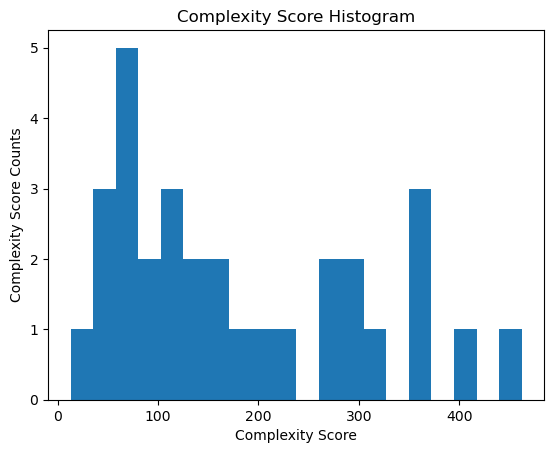

In [7]:
plt.hist(allComp,20)
plt.xlabel('Complexity Score')
plt.ylabel('Complexity Score Counts')
plt.title('Complexity Score Histogram')
plt.savefig(os.getcwd() + '\\figure outputs\\Complexity Score Histogram.png')

## Finding the Maximum Complexity Score

In [8]:
i = 0
init = 0

size = allComp.shape

while i < size[0]:
    curVal = allComp[i]
    
    if curVal >= init:
        init = curVal
        maxidx = i
    i = i + 1

print(maxidx)
print(init)

9
462


## Finding the Minimum Complexity Score

In [9]:
i = 0
init = 400

size = allComp.shape

while i < size[0]:
    curVal = allComp[i]
    
    if curVal <= init:
        init = curVal
        minidx = i
    i = i + 1

print(minidx)
print(init)

22
13


## Visualizing the Max and Min "Complexity"

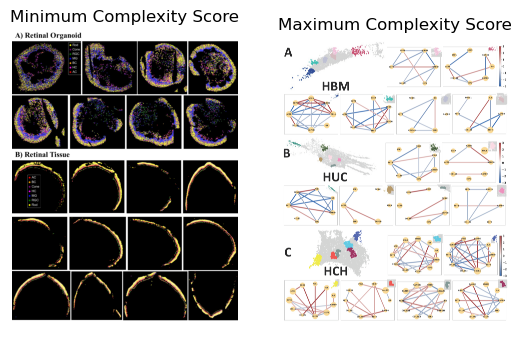

In [10]:
minImgPath = str(allFiles[minidx])
maxImgPath = str(allFiles[maxidx])

minImg = cv2.imread(minImgPath)
minImg = cv2.cvtColor(minImg, cv2.COLOR_BGR2RGB)
maxImg = cv2.imread(maxImgPath)
maxImg = cv2.cvtColor(maxImg, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(minImg)
plt.title('Minimum Complexity Score')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(maxImg)
plt.title('Maximum Complexity Score')
plt.axis('off')
plt.savefig(os.getcwd() + '\\figure outputs\\Min and Max Complexity Score.png')